# CfRadial1

In [1]:
import xarray as xr
import xradar as xd
from open_radar_data import DATASETS

## Download

Fetching CfRadial1 radar data file from [open-radar-data](https://github.com/openradar/open-radar-data) repository.

In [2]:
filename = DATASETS.fetch("cfrad.20080604_002217_000_SPOL_v36_SUR.nc")

## xr.open_dataset

Making use of the xarray `cfradial1` backend. We also need to provide the group.

In [3]:
ds = xr.open_dataset(filename, group="sweep_0", engine="cfradial1")
display(ds)

<xarray.Dataset>
Dimensions:                    (azimuth: 483, range: 996)
Coordinates:
    time                       (azimuth) datetime64[ns] ...
  * range                      (range) float32 150.0 300.0 ... 1.494e+05
  * azimuth                    (azimuth) float32 0.0 0.75 1.5 ... 358.5 359.2
    elevation                  (azimuth) float32 ...
    latitude                   float64 ...
    longitude                  float64 ...
    altitude                   float64 ...
Data variables: (12/18)
    sweep_number               int32 ...
    sweep_mode                 |S32 ...
    prt_mode                   |S32 ...
    follow_mode                |S32 ...
    sweep_fixed_angle          float32 ...
    pulse_width                (azimuth) timedelta64[ns] ...
    ...                         ...
    r_calib_index              (azimuth) int8 ...
    measured_transmit_power_h  (azimuth) float32 ...
    measured_transmit_power_v  (azimuth) float32 ...
    scan_rate                  (azimuth) float32 ...
    DBZ                        (azimuth, range) float32 ...
    VR                         (azimuth, range) float32 ...

### Plot Time vs. Azimuth

We need to sort by time and specify the coordinate.

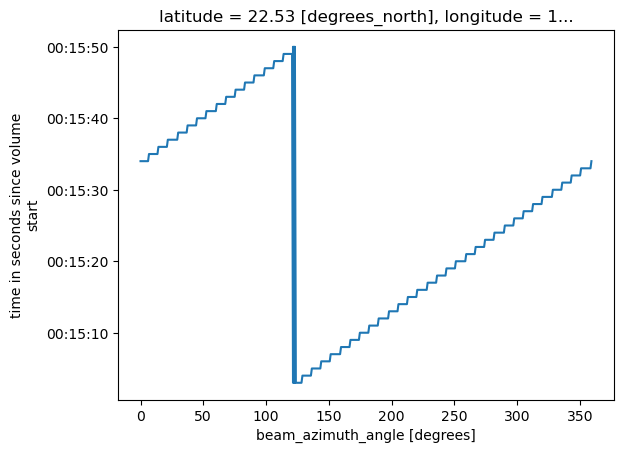

In [4]:
ds.azimuth.plot(y="time")

### Plot Range vs. Time

We need to sort by time and specify the coordinate.

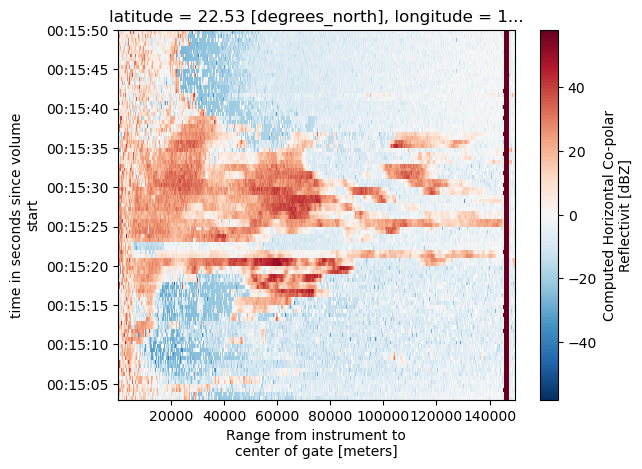

In [5]:
ds.DBZ.sortby("time").plot(y="time")

### Plot Range vs. Azimuth


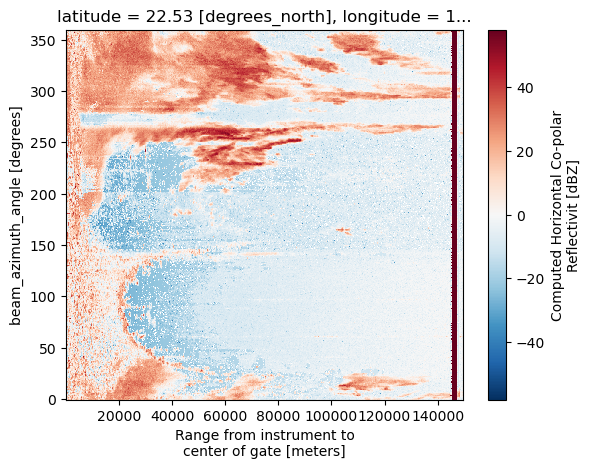

In [6]:
ds.DBZ.plot()

## backend_kwargs

The cfradial1 backend can be parameterized via kwargs. Please observe the possibilities below.

In [7]:
?xd.io.CfRadial1BackendEntrypoint

In [9]:
ds = xr.open_dataset(filename, group="sweep_0", engine="cfradial1", first_dim="time")
display(ds)

<xarray.Dataset>
Dimensions:                    (time: 483, range: 996)
Coordinates:
  * time                       (time) datetime64[ns] 2008-06-04T00:15:03 ... ...
  * range                      (range) float32 150.0 300.0 ... 1.494e+05
    azimuth                    (time) float32 ...
    elevation                  (time) float32 ...
    latitude                   float64 ...
    longitude                  float64 ...
    altitude                   float64 ...
Data variables: (12/18)
    sweep_number               int32 ...
    sweep_mode                 |S32 ...
    prt_mode                   |S32 ...
    follow_mode                |S32 ...
    sweep_fixed_angle          float32 ...
    pulse_width                (time) timedelta64[ns] ...
    ...                         ...
    r_calib_index              (time) int8 ...
    measured_transmit_power_h  (time) float32 ...
    measured_transmit_power_v  (time) float32 ...
    scan_rate                  (time) float32 ...
    DBZ                        (time, range) float32 ...
    VR                         (time, range) float32 ...

In [10]:
ds = xr.open_dataset(
    filename, group="sweep_1", engine="cfradial1", backend_kwargs=dict(first_dim="time")
)
display(ds)

<xarray.Dataset>
Dimensions:                    (time: 483, range: 996)
Coordinates:
  * time                       (time) datetime64[ns] 2008-06-04T00:15:50 ... ...
  * range                      (range) float32 150.0 300.0 ... 1.494e+05
    azimuth                    (time) float32 ...
    elevation                  (time) float32 ...
    latitude                   float64 ...
    longitude                  float64 ...
    altitude                   float64 ...
Data variables: (12/18)
    sweep_number               int32 ...
    sweep_mode                 |S32 ...
    prt_mode                   |S32 ...
    follow_mode                |S32 ...
    sweep_fixed_angle          float32 ...
    pulse_width                (time) timedelta64[ns] ...
    ...                         ...
    r_calib_index              (time) int8 ...
    measured_transmit_power_h  (time) float32 ...
    measured_transmit_power_v  (time) float32 ...
    scan_rate                  (time) float32 ...
    DBZ                        (time, range) float32 ...
    VR                         (time, range) float32 ...

## open_cfradial1_datatree

The same works analoguous with the datatree loader. But additionally we can provide a sweep number or list.

In [ ]:
?xd.io.open_cfradial1_datatree

In [3]:
dtree = xd.io.open_cfradial1_datatree(
    filename,
    first_dim="time",
    optional=False,
)
display(dtree)

DataTree('root', parent=None)
│   Dimensions:              (sweep: 9)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int32 ...
│       time_coverage_start  |S32 ...
│       time_coverage_end    |S32 ...
│       latitude             float64 ...
│       longitude            float64 ...
│       altitude             float64 ...
│       sweep_group_name     (sweep) <U7 'sweep_0' 'sweep_1' ... 'sweep_7' 'sweep_8'
│       sweep_fixed_angle    (sweep) float32 ...
│   Attributes:
│       Conventions:         CF/Radial instrument_parameters radar_parameters rad...
│       version:             1.2
│       title:               TIMREX
│       institution:         
│       references:          
│       source:              
│       history:             
│       comment:             
│       instrument_name:     SPOLRVP8
│       platform_is_mobile:  false
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_receiver_bandwidth  float32 ...
│           radar_beam_width_v        float32 ...
│           radar_beam_width_h        float32 ...
│           radar_antenna_gain_h      float32 ...
│           radar_antenna_gain_v      float32 ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/45)
│           time                      |S32 ...
│           pulse_width               timedelta64[ns] ...
│           xmit_power_h              float32 ...
│           xmit_power_v              float32 ...
│           two_way_waveguide_loss_h  float32 ...
│           two_way_waveguide_loss_v  float32 ...
│           ...                        ...
│           test_power_h              float32 ...
│           test_power_v              float32 ...
│           receiver_slope_hc         float32 ...
│           receiver_slope_vc         float32 ...
│           receiver_slope_hx         float32 ...
│           receiver_slope_vx         float32 ...
├── DataTree('georeferencing_correction')
│       Dimensions:                            ()
│       Data variables: (12/16)
│           heading_correction                 float32 ...
│           azimuth_correction                 float32 ...
│           latitude_correction                float32 ...
│           drift_correction                   float32 ...
│           pitch_correction                   float32 ...
│           tilt_correction                    float32 ...
│           ...                                 ...
│           range_correction                   float32 ...
│           northward_ground_speed_correction  float32 ...
│           longitude_correction               float32 ...
│           vertical_velocity_correction       float32 ...
│           elevation_correction               float32 ...
│           pressure_altitude_correction       float32 ...
├── DataTree('sweep_0')
│       Dimensions:            (time: 483, range: 996)
│       Coordinates:
│         * time               (time) datetime64[ns] 2008-06-04T00:15:03 ... 2008-06-...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05 1.494e+05
│           azimuth            (time) float32 ...
│           elevation          (time) float32 ...
│           latitude           float64 ...
│           longitude          float64 ...
│           altitude           float64 ...
│       Data variables:
│           sweep_number       int32 ...
│           sweep_mode         |S32 ...
│           prt_mode           |S32 ...
│           follow_mode        |S32 ...
│           sweep_fixed_angle  float32 ...
│           DBZ                (time, range) float32 ...
│           VR                 (time, range) float32 ...
├── DataTree('sweep_1')
│       Dimensions:            (time: 483, range: 996)
│       Coordinates:
│         * time               (time) datetime64[ns] 2008-06-04T00:15:50 ... 2008-06-...
│         * range              (range) float32 150.0 300.0 450.0 ... 1.492e+05

## Export Data

In [23]:
xd.io.export.to_cfradial1(dtree, filename='cfrad.20080604_002217_000_QCed.nc')

### Plot Sweep Range vs. Time

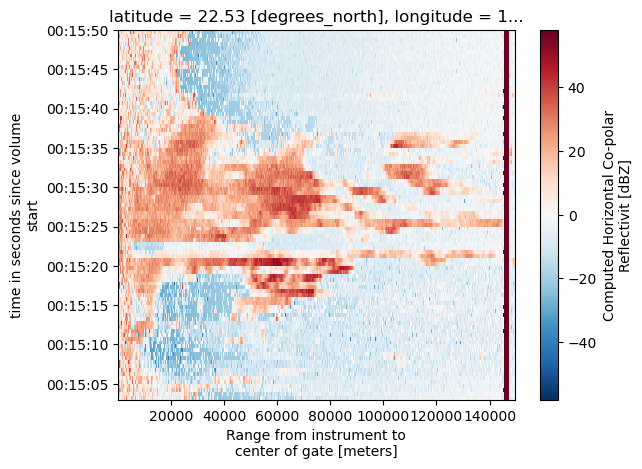

In [12]:
dtree["sweep_0"].ds.DBZ.plot()

### Plot Sweep Range vs. Azimuth

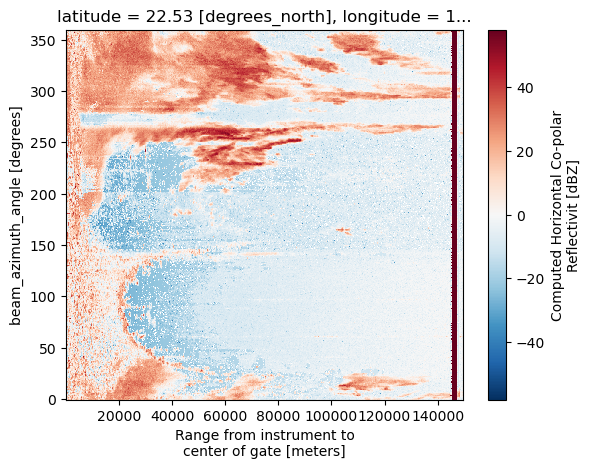

In [13]:
dtree["sweep_0"].ds.DBZ.sortby("azimuth").plot(y="azimuth")

In [14]:
dtree = xd.io.open_cfradial1_datatree(filename, sweep=[0, 1, 8])
display(dtree)

DataTree('root', parent=None)
│   Dimensions:              (sweep: 9)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int32 ...
│       platform_type        |S32 ...
│       primary_axis         |S32 ...
│       status_str           |S1 ...
│       instrument_type      |S32 ...
│       time_coverage_start  |S32 ...
│       time_coverage_end    |S32 ...
│       latitude             float64 ...
│       longitude            float64 ...
│       altitude             float64 ...
│       sweep_group_name     (sweep) <U7 'sweep_0' 'sweep_1' ... 'sweep_7' 'sweep_8'
│       sweep_fixed_angle    (sweep) float32 ...
│   Attributes: (12/13)
│       Conventions:         CF/Radial instrument_parameters radar_parameters rad...
│       version:             1.2
│       title:               TIMREX
│       institution:         
│       references:          
│       source:              
│       ...                  ...
│       comment:             
│       instrument_name:     SPOLRVP8
│       site_name:           
│       scan_name:           
│       scan_id:             0
│       platform_is_mobile:  false
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_antenna_gain_v      float32 ...
│           radar_antenna_gain_h      float32 ...
│           radar_receiver_bandwidth  float32 ...
│           radar_beam_width_h        float32 ...
│           radar_beam_width_v        float32 ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/45)
│           time                      |S32 ...
│           pulse_width               timedelta64[ns] ...
│           xmit_power_h              float32 ...
│           xmit_power_v              float32 ...
│           two_way_waveguide_loss_h  float32 ...
│           two_way_waveguide_loss_v  float32 ...
│           ...                        ...
│           test_power_h              float32 ...
│           test_power_v              float32 ...
│           receiver_slope_hc         float32 ...
│           receiver_slope_vc         float32 ...
│           receiver_slope_hx         float32 ...
│           receiver_slope_vx         float32 ...
├── DataTree('georeferencing_correction')
│       Dimensions:                            ()
│       Data variables: (12/16)
│           pitch_correction                   float32 ...
│           longitude_correction               float32 ...
│           northward_ground_speed_correction  float32 ...
│           roll_correction                    float32 ...
│           rotation_correction                float32 ...
│           eastward_ground_speed_correction   float32 ...
│           ...                                 ...
│           azimuth_correction                 float32 ...
│           drift_correction                   float32 ...
│           heading_correction                 float32 ...
│           radar_altitude_correction          float32 ...
│           elevation_correction               float32 ...
│           pressure_altitude_correction       float32 ...
├── DataTree('sweep_0')
│       Dimensions:                    (azimuth: 483, range: 996)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 2008-06-04T00:15:34 ....
│         * range                      (range) float32 150.0 300.0 ... 1.494e+05
│         * azimuth                    (azimuth) float32 0.0 0.75 1.5 ... 358.5 359.2
│           elevation                  (azimuth) float32 ...
│           latitude                   float64 ...
│           longitude                  float64 ...
│           altitude                   float64 ...
│       Data variables: (12/18)
│           sweep_number               int32 ...
│           sweep_mode                 |S32 ...
│           prt_mode                   |S32 ...
│           follow_mode                |S32 ...
│           sweep_fixed_angle          float32 ...
│     

In [4]:
dtree = xd.io.open_cfradial1_datatree(filename, sweep=["sweep_0", "sweep_4", "sweep_8"])
display(dtree)

DataTree('root', parent=None)
│   Dimensions:              (sweep: 9)
│   Dimensions without coordinates: sweep
│   Data variables:
│       volume_number        int32 ...
│       platform_type        |S32 ...
│       primary_axis         |S32 ...
│       status_str           |S1 ...
│       instrument_type      |S32 ...
│       time_coverage_start  |S32 ...
│       time_coverage_end    |S32 ...
│       latitude             float64 ...
│       longitude            float64 ...
│       altitude             float64 ...
│       sweep_group_name     (sweep) <U7 'sweep_0' 'sweep_1' ... 'sweep_7' 'sweep_8'
│       sweep_fixed_angle    (sweep) float32 ...
│   Attributes: (12/13)
│       Conventions:         CF/Radial instrument_parameters radar_parameters rad...
│       version:             1.2
│       title:               TIMREX
│       institution:         
│       references:          
│       source:              
│       ...                  ...
│       comment:             
│       instrument_name:     SPOLRVP8
│       site_name:           
│       scan_name:           
│       scan_id:             0
│       platform_is_mobile:  false
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_receiver_bandwidth  float32 ...
│           radar_beam_width_v        float32 ...
│           radar_beam_width_h        float32 ...
│           radar_antenna_gain_h      float32 ...
│           radar_antenna_gain_v      float32 ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/45)
│           time                      |S32 ...
│           pulse_width               timedelta64[ns] ...
│           xmit_power_h              float32 ...
│           xmit_power_v              float32 ...
│           two_way_waveguide_loss_h  float32 ...
│           two_way_waveguide_loss_v  float32 ...
│           ...                        ...
│           test_power_h              float32 ...
│           test_power_v              float32 ...
│           receiver_slope_hc         float32 ...
│           receiver_slope_vc         float32 ...
│           receiver_slope_hx         float32 ...
│           receiver_slope_vx         float32 ...
├── DataTree('georeferencing_correction')
│       Dimensions:                            ()
│       Data variables: (12/16)
│           heading_correction                 float32 ...
│           azimuth_correction                 float32 ...
│           latitude_correction                float32 ...
│           drift_correction                   float32 ...
│           pitch_correction                   float32 ...
│           tilt_correction                    float32 ...
│           ...                                 ...
│           range_correction                   float32 ...
│           northward_ground_speed_correction  float32 ...
│           longitude_correction               float32 ...
│           vertical_velocity_correction       float32 ...
│           elevation_correction               float32 ...
│           pressure_altitude_correction       float32 ...
├── DataTree('sweep_0')
│       Dimensions:                    (azimuth: 483, range: 996)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 2008-06-04T00:15:34 ....
│         * range                      (range) float32 150.0 300.0 ... 1.494e+05
│         * azimuth                    (azimuth) float32 0.0 0.75 1.5 ... 358.5 359.2
│           elevation                  (azimuth) float32 ...
│           latitude                   float64 ...
│           longitude                  float64 ...
│           altitude                   float64 ...
│       Data variables: (12/18)
│           sweep_number               int32 ...
│           sweep_mode                 |S32 ...
│           prt_mode                   |S32 ...
│           follow_mode                |S32 ...
│           sweep_fixed_angle          float32 ...
│     

In [5]:
xd.io.export.to_cfradial1(dtree, filename='cfrad.20080604_002217_000_QCed.nc')

AttributeError: 'DataTree' object has no attribute 'subset'

In [30]:
!cat ~/Git_Stuff/xradar/xradar/io/export/cfradial1.py

#!/usr/bin/env python
# Copyright (c) 2022, openradar developers.
# Distributed under the MIT License. See LICENSE for more info.

"""

CfRadial1 output

This sub-module contains the writer for export of CfRadial1-based radar
data.

Author: @syedhamidali.

Example::

    import xradar as xd
    dtree = xd.io.to_cfradial1(dtree, filename)

.. autosummary::
   :nosignatures:
   :toctree: generated/

   {}

"""

__all__ = [
    "to_cfradial1",
]

import numpy as np
import xarray as xr


def _calib_mapper(calib_params):
    """
    Map calibration parameters to a new dataset format.

    Parameters:
    - calib_params: xarray.Dataset
        Calibration parameters dataset.

    Returns:
    xarray.Dataset
        New dataset with mapped calibration parameters.
    """
    new_data_vars = {}
    for var in calib_params.data_vars:
        data_array = calib_params[var]
        new_data_vars["r_calib_" + var] = xr.DataArray(
            data=data_array.data[np.newaxis, ...],
            dims=

In [35]:
!code ../../